# Importing modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


# Dataset

In [2]:
f = open("dataset.txt", "r")

In [3]:
x = np.array([])
y = np.array([])

for i in f:
    i = i.strip()
    l = [int(s) for s in i.split() if s.isdigit()]
    x = np.append(x,l[0])
    y = np.append(y,l[1])
    

# Normalization 

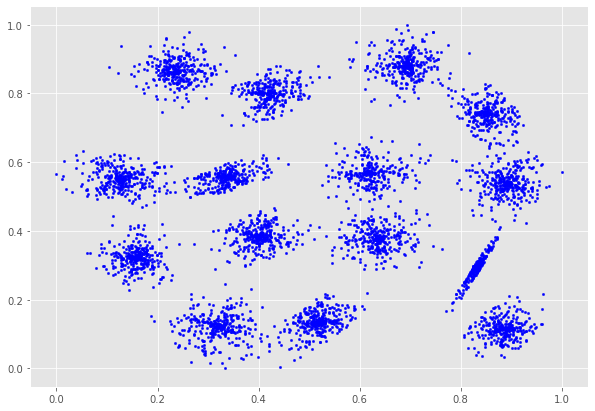

In [32]:
x = (x - x.min())/(x.max() - x.min())
y = (y - y.min())/(y.max() - y.min())
plt.figure(figsize = (10,7))
plt.scatter(x,y,s=5,c='b')
plt.show()

# K Means Clustering

In [18]:
def euclidean_dis(x1,y1,x2,y2):
    return np.sqrt((np.square(x2-x1))+(np.square(y2-y1)))
    

In [54]:
def cost_func(centroids,cluster):
    acum = 0
    for i in range(len(cluster)):
        acum += euclidean_dis(x[i],y[i],centroids[cluster[i]][0],centroids[cluster[i]][1])
    return acum/5000.0
    

In [113]:
def kmc(k):
    tolerance = 0.0001
    iteration = 300
    centroids = {}
    r = [i for i in range(0,len(x))]  
    np.random.shuffle(r)
    for i in range(k):
        centroids[i] = [x[r[i]],y[r[i]]]
    for i in range(iteration):
        label = {}
            
        for  j in range(k):
            label[j] = []
            
        for j in range(len(x)):
            dis = [euclidean_dis(x[j],y[j],centroids[c][0],centroids[c][1]) for c in centroids]
            idx = dis.index(min(dis))
            label[idx].append([x[j],y[j]])
            
        prev_centroids = dict(centroids)
            
        for j in label:
            centroids[j] = np.average(label[j],axis=0)
        
        flag = False
        x_sum,y_sum = 0,0
        
        for c in centroids:
            ori_c = prev_centroids[c]
            cur_c = centroids[c]
            x_sum += abs(ori_c[0]-cur_c[0])
            y_sum += abs(ori_c[1]-cur_c[1])
        e = x_sum + y_sum
        if (e/15.0)<tolerance:
            flag = True
            
                
        if flag:
            break
            
    cluster = []
    for i in range(len(x)):
        dis = [euclidean_dis(x[i],y[i],centroids[c][0],centroids[c][1]) for c in centroids]
        idx = dis.index(min(dis))
        cluster.append(idx)
    
    return centroids,cluster


k_val = []

for k in range(1,21):
    c = float('inf')
    for i in range(20):
        centroids,cluster = kmc(k)
        cost = cost_func(centroids,cluster)
        if (c>cost):
            c = cost
            u_centroids,u_cluster = centroids,cluster
    k_val.append(c)
    

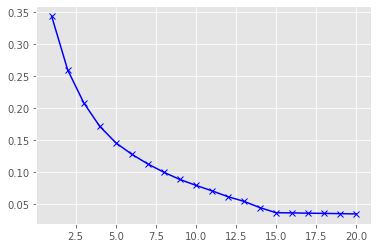

In [115]:
xk = [i for i in range(1,21)]
plt.plot(xk,k_val, 'bx-')
plt.show()

# From the 'Elbow Curve' we can choose k = 15

# First the data is normalized and then centroids are chosen from data points. If the data is not normalized and if the centroids are randomly initialize sometimes any outlier may be choosen and any datapoints may not be under this centroid. So in here first the data is normalized and then centroids are chosen from the datapoints.

In [118]:
c = float('inf')
for i in range(20):
    centroids,cluster = kmc(15)
    cost = cost_func(centroids,cluster)
    if (c>cost):
        c = cost
        u_centroids,u_cluster = centroids,cluster

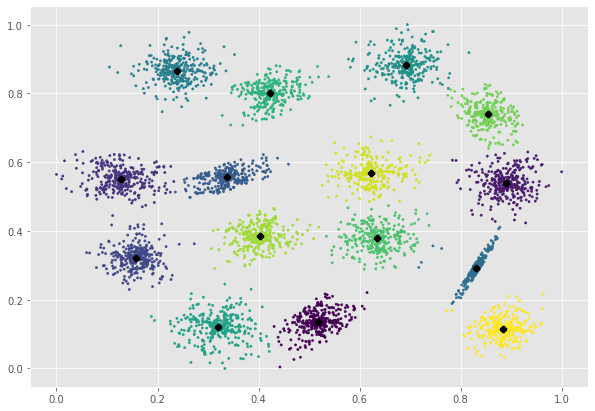

In [119]:
plt.figure(figsize = (10,7))
plt.scatter(x,y,s=5,c=u_cluster)
for i in u_centroids:
    plt.scatter(u_centroids[i][0],u_centroids[i][1],s=20,c='k',marker='x',linewidth=5)
plt.show()

# Reporting the clusters plotting with different colors and labeled with alphabets

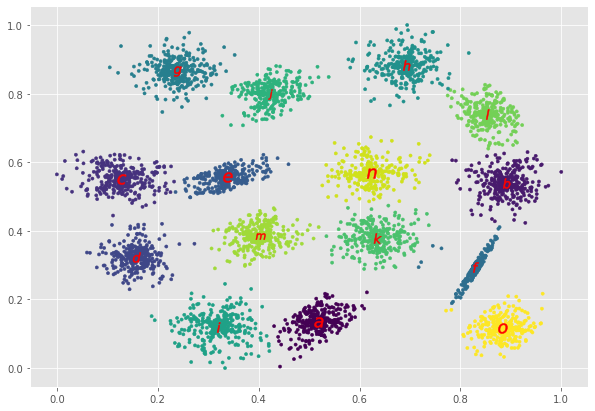

In [128]:
alpha = [chr(i) for i in range(97,97+15)]

plt.figure(figsize = (10,7))
plt.scatter(x,y,s=10,c=u_cluster)
for i in u_centroids:
    plt.scatter(u_centroids[i][0],u_centroids[i][1],s=100,c='r',marker="$"+alpha[i]+"$")
plt.show()